### Import Necessary Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('./Data/Loan Prediction Train Data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

#### 1.Check the Dimensions of the Dataframe

In [3]:
df.shape

(614, 13)

#### 2.Check the Data types of the Fields in the Data Frame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### 3.Check for Null Values in the Dataframe

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df1 = df.copy()

#### 4.Filling missing numeric values with Mean value

In [7]:
Mean_Loan_Amount = df1['LoanAmount'].mean()

In [8]:
df1['LoanAmount'].fillna(Mean_Loan_Amount, inplace = True)

In [9]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
Mean_Load_Amount_Term = df1['Loan_Amount_Term'].mean()

In [11]:
df1['Loan_Amount_Term'].fillna(Mean_Load_Amount_Term, inplace = True)

In [12]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### 5.Dropping Numeric Field from Data Frame

In [13]:
df2 = df1.copy()

In [14]:
df2.dropna(subset = ['Credit_History'] ,inplace = True)

In [17]:
df2.isnull().sum()

Loan_ID               0
Gender               12
Married               3
Dependents           15
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### 6.Dropping all NaN Categorical Fields from Data Frame

In [19]:
df3 = df2.copy()

In [20]:
df3.dropna(inplace = True)

In [21]:
df3.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [22]:
df3.shape

(511, 13)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            511 non-null    object 
 1   Gender             511 non-null    object 
 2   Married            511 non-null    object 
 3   Dependents         511 non-null    object 
 4   Education          511 non-null    object 
 5   Self_Employed      511 non-null    object 
 6   ApplicantIncome    511 non-null    int64  
 7   CoapplicantIncome  511 non-null    float64
 8   LoanAmount         511 non-null    float64
 9   Loan_Amount_Term   511 non-null    float64
 10  Credit_History     511 non-null    float64
 11  Property_Area      511 non-null    object 
 12  Loan_Status        511 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 55.9+ KB


In [24]:
df3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


#### 7.Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
df4 = df3.copy()

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df5 = df4.apply(LabelEncoder().fit_transform)

In [72]:
df5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,322,0,95,8,1,2,1
1,1,1,1,1,0,0,263,53,76,8,1,0,0
2,2,1,1,0,0,1,120,0,23,8,1,2,1
3,3,1,1,0,1,0,81,142,68,8,1,2,1
4,4,1,0,0,0,0,327,0,89,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,506,0,0,0,0,0,109,0,26,8,1,0,1
610,507,1,1,3,0,0,235,0,7,4,1,0,1
611,508,1,1,1,0,0,370,3,155,8,1,2,1
612,509,1,1,2,0,0,362,0,127,8,1,2,1


#### 7.Dropping Fields and Converting Dataframe

In [73]:
df5.drop('Loan_ID',axis = 1,inplace = True)

In [74]:
df6 = df5.apply(pd.to_numeric)

In [75]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             511 non-null    int32
 1   Married            511 non-null    int32
 2   Dependents         511 non-null    int32
 3   Education          511 non-null    int32
 4   Self_Employed      511 non-null    int32
 5   ApplicantIncome    511 non-null    int64
 6   CoapplicantIncome  511 non-null    int64
 7   LoanAmount         511 non-null    int64
 8   Loan_Amount_Term   511 non-null    int64
 9   Credit_History     511 non-null    int64
 10  Property_Area      511 non-null    int32
 11  Loan_Status        511 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 37.9 KB


#### 8.Finding the Correlation Matrix

<AxesSubplot:>

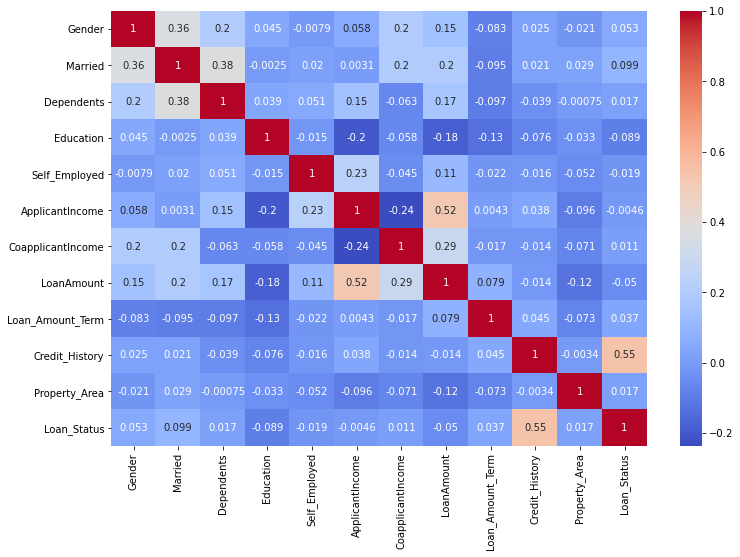

In [76]:
fig_dim = (12,8)
fig, ax = plt.subplots(figsize=fig_dim)
corr = df6.corr()
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

#### 9.Dropping Fields that have no impact on the Y variable

In [77]:
filt = ['Education','Self_Employed','ApplicantIncome','LoanAmount']

In [78]:
df7 = df6.copy()

In [79]:
df7.drop(filt,axis = 1,inplace = True)

In [80]:
df7.head()

,Gender,Married,Dependents,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,8,1,2,1
1,1,1,1,53,8,1,0,0
2,1,1,0,0,8,1,2,1
3,1,1,0,142,8,1,2,1
4,1,0,0,0,8,1,2,1


In [81]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 511 entries, 0 to 613
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             511 non-null    int32
 1   Married            511 non-null    int32
 2   Dependents         511 non-null    int32
 3   CoapplicantIncome  511 non-null    int64
 4   Loan_Amount_Term   511 non-null    int64
 5   Credit_History     511 non-null    int64
 6   Property_Area      511 non-null    int32
 7   Loan_Status        511 non-null    int32
dtypes: int32(5), int64(3)
memory usage: 25.9 KB


#### 10.Feature Engineering using Inter Quartile Range

In [109]:
max_Loan_Amount_Term_threshold = df7['CoapplicantIncome'].quantile(0.95)
max_Loan_Amount_Term_threshold

223.5

In [110]:
min_Loan_Amount_Term_threshold = df7['CoapplicantIncome'].quantile(0.05)
min_Loan_Amount_Term_threshold

0.0

In [111]:
condition = ((df7['CoapplicantIncome'] >= min_Loan_Amount_Term_threshold) & (df7['CoapplicantIncome'] <= max_Loan_Amount_Term_threshold))

In [112]:
df8 = df7[condition]

In [113]:
df8.shape

(485, 8)

In [114]:
df8.head()

,Gender,Married,Dependents,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,8,1,2,1
1,1,1,1,53,8,1,0,0
2,1,1,0,0,8,1,2,1
3,1,1,0,142,8,1,2,1
4,1,0,0,0,8,1,2,1


#### 11.Aggregate Field

In [115]:
df8['CoapplicantIncome'].agg(['max','min','mean'])

max     223.000000
min       0.000000
mean     59.185567
Name: CoapplicantIncome, dtype: float64

#### 12.Visualisation

<AxesSubplot:ylabel='Married'>

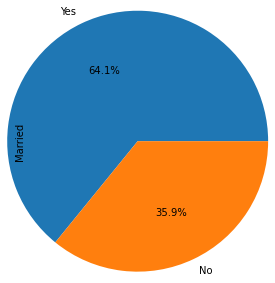

In [116]:
df8['Married'].value_counts(normalize = True).plot.pie(labels = ['Yes','No'],autopct = '%1.1f%%',radius = 1.5)

(array([  2.,   1.,   3.,   3.,  35.,   2.,   8.,  12., 419.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

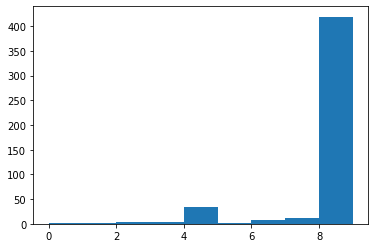

In [119]:
plt.hist(df8['Loan_Amount_Term'], bins=9)

(array([283.,  80.,  81.,  41.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

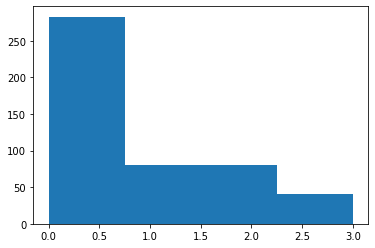

In [122]:
plt.hist(df8['Dependents'], bins=4)

## Modelling

In [123]:
X = df8.drop(['Loan_Status'], axis='columns')
y = df8['Loan_Status']

#### 1.Logistic Regression

In [125]:
from sklearn.model_selection import cross_val_score

In [131]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

In [132]:
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.8123711340206186

#### 2.Decision Tree Classifier

In [127]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

In [128]:
cross_val_score(dt, X, y, cv=5, scoring='accuracy').mean()

0.7690721649484535

#### 3.Random Forest Classifier

In [133]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=10)

In [134]:
cross_val_score(rf, X, y, cv=5, scoring='accuracy').mean()

0.7298969072164948

#### 4.Stack Modelling

In [136]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    
    
    
    ('rf',rf),
    ('dt',dt) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

In [137]:
cross_val_score(stack_model, X, y, cv=5, scoring='accuracy').mean()

0.7711340206185566

# Testing the Model

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [145]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [146]:
logreg.score(X_test, y_test)

0.8041237113402062

In [148]:
y_predicted = logreg.predict(X_test)

### Confusion Matrix

In [149]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 9, 16],
       [ 3, 69]], dtype=int64)

Text(69.0, 0.5, 'Truth')

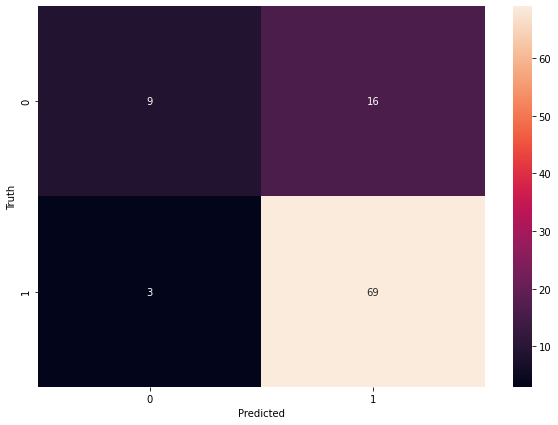

In [150]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')